## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data to work with

In [3]:
# Load the CSV file
google_stock = pd.read_csv('GOOGLE STOCKS.csv')

# Display the first few rows
google_stock.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


## Data formating

In [5]:
google_stock = google_stock[['date','open','close']] # Extracting required columns
google_stock['date'] = pd.to_datetime(google_stock['date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock.set_index('date',drop=True,inplace=True) # Setting date column as index
google_stock.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


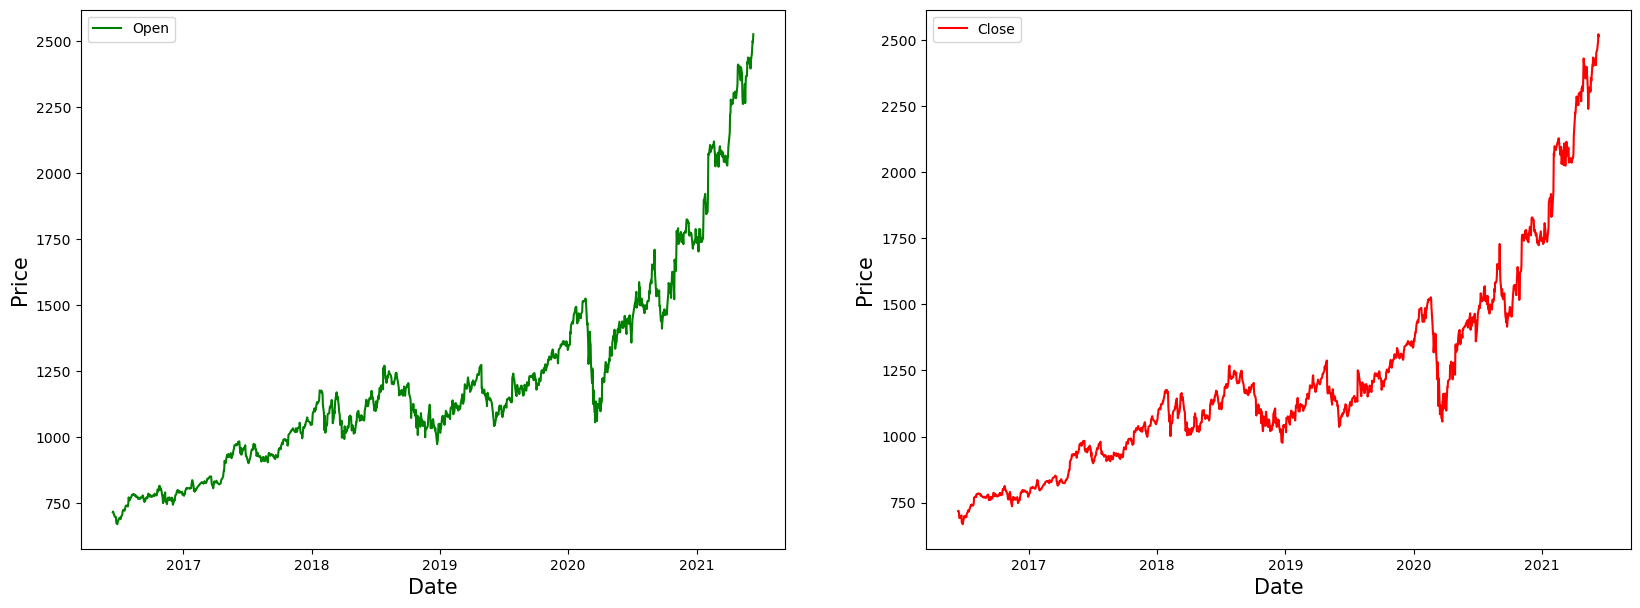

In [6]:

fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_stock['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

## Data Pre-Processing

In [7]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock[google_stock.columns] = MMS.fit_transform(google_stock)


In [8]:
google_stock.shape

(1258, 2)

In [9]:
training_size = round(len(google_stock) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [10]:
train_data = google_stock[:training_size]
test_data  = google_stock[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

## CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

# Reshape data for CNN (samples, timesteps, features)
train_X_cnn = np.reshape(train_data.values, (train_data.shape[0], train_data.shape[1], 1))
test_X_cnn = np.reshape(test_data.values, (test_data.shape[0], test_data.shape[1], 1))

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_X_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(2))  # Assuming 2 outputs for open and close prices

cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(train_X_cnn, train_data.values, epochs=100, batch_size=32, verbose=1)

# Predictions
cnn_predictions = cnn_model.predict(test_X_cnn)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0316  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7926e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1143e-05
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8749e-05
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7989e-05
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6238e-05
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4297e-05
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3624e-05
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4545e-05
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2373e-05
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1663e-05
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2112e-05
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1024e-05
Epoch 15/100
32/32 ━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1792e-08
Epoch 80/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9813e-08 
Epoch 81/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3991e-08
Epoch 82/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4082e-08
Epoch 83/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2039e-08
Epoch 84/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4006e-08
Epoch 85/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5297e-08
Epoch 86/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5305e-08 
Epoch 87/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7537e-08
Epoch 88/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2929e-08 
Epoch 89/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3558e-08
Epoch 90/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6486e-08
Epoch 91/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5808e-08
Epoch 92/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6434e-08
Epoch 93/100
32/

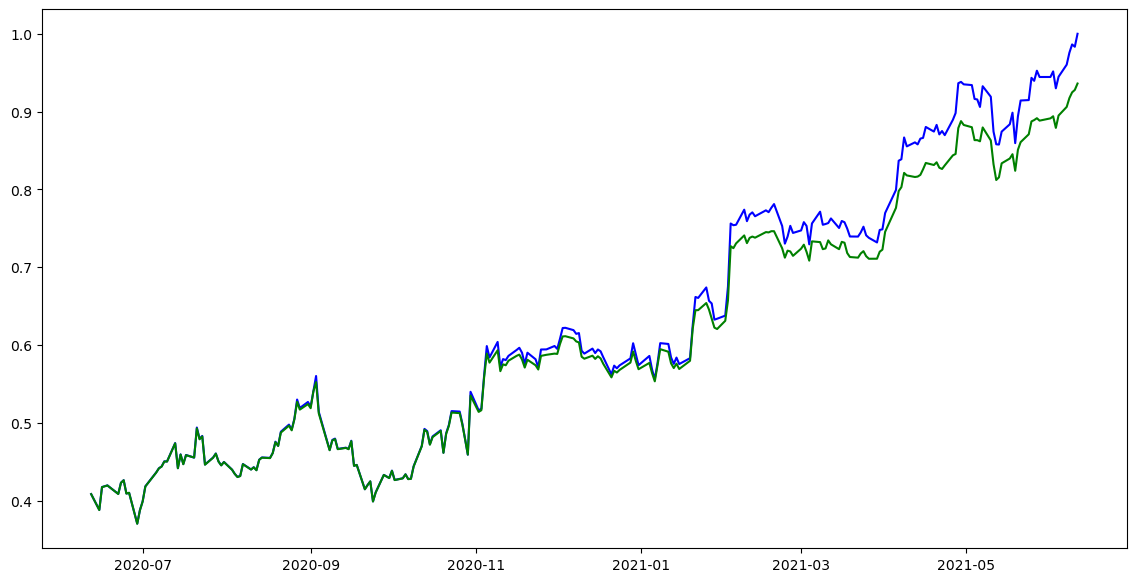

In [13]:
plt.figure(figsize=(14,7))

plt.plot(test_data.index, test_data['open'], color='blue', label='Actual Open Price')
plt.plot(test_data.index, cnn_predictions[:,0], color='green', label='CNN Open Predictions')

## LSTM

In [14]:
from tensorflow.keras.layers import LSTM

# Reshape data for LSTM (samples, timesteps, features)
train_X_lstm = np.reshape(train_data.values, (train_data.shape[0], 1, train_data.shape[1]))
test_X_lstm = np.reshape(test_data.values, (test_data.shape[0], 1, test_data.shape[1]))

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(2))

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(train_X_lstm, train_data.values, epochs=100, batch_size=32, verbose=1)

# Predictions
lstm_predictions = lstm_model.predict(test_X_lstm)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0362
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4686e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4265e-05
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0705e-05
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6475e-05
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7103e-05
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4315e-05
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3954e-05
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2049e-05
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1493e-05
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3401e-05
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7657e-05
Epoch 15/100
32/32 ━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1145e-05
Epoch 80/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9512e-06
Epoch 81/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0275e-05
Epoch 82/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6296e-06
Epoch 83/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4865e-06
Epoch 84/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2886e-06
Epoch 85/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0885e-05
Epoch 86/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9868e-06
Epoch 87/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4953e-06
Epoch 88/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9840e-06
Epoch 89/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0322e-06
Epoch 90/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1649e-06
Epoch 91/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0654e-06
Epoch 92/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1749e-06
Epoch 93/100
32/32 

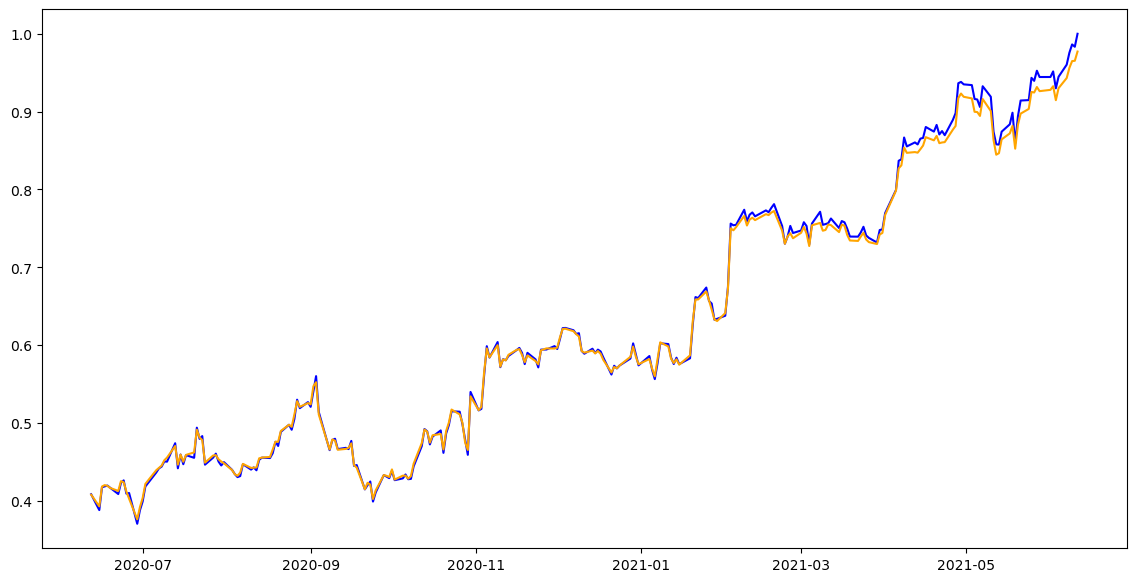

In [16]:
plt.figure(figsize=(14,7))

plt.plot(test_data.index, test_data['open'], color='blue', label='Actual Open Price')
plt.plot(test_data.index, lstm_predictions[:,0], color='orange', label='LSTM Open Predictions')

#### The Algorithms mentioned Hereafter do not give a good result, they do not work even after adding lag-features and Fine tuning of parameters like c (Regularization parameter) and epsilon

#### This can show that even advance algorithms cannot fit into every data setand under given conditions and type of data, one algorithm can perform better than other. Its about experimentation.

## SVM  (Support vector regression)

In [17]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
google_stock = pd.read_csv('GOOGLE STOCKS.csv')

# Display the first few rows
google_stock.head()

google_stock.info()

# Extract required columns
google_stock = google_stock[['date', 'open', 'close']]
google_stock['date'] = pd.to_datetime(google_stock['date'].apply(lambda x: x.split()[0]))  # Selecting only date
google_stock.set_index('date', drop=True, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [18]:
# Add lag features
google_stock['lag_1'] = google_stock['close'].shift(1)
google_stock['lag_2'] = google_stock['close'].shift(2)

# Drop rows with NaN values
google_stock.dropna(inplace=True)


In [19]:
# Split the data into training and test sets
training_size = round(len(google_stock) * 0.80)  # 80% for training and 20% for testing
train_data = google_stock[:training_size]
test_data = google_stock[training_size:]

print(f"Training Size: {len(train_data)}")
print(f"Test Size: {len(test_data)}")

print(f"Training Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")


Training Size: 1005
Test Size: 251
Training Data Shape: (1005, 4)
Test Data Shape: (251, 4)


In [20]:
# Normalize the data
MMS = MinMaxScaler()
train_data_scaled = MMS.fit_transform(train_data)
test_data_scaled = MMS.transform(test_data)

train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns, index=train_data.index)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns, index=test_data.index)


SVR Mean Squared Error: 0.7535


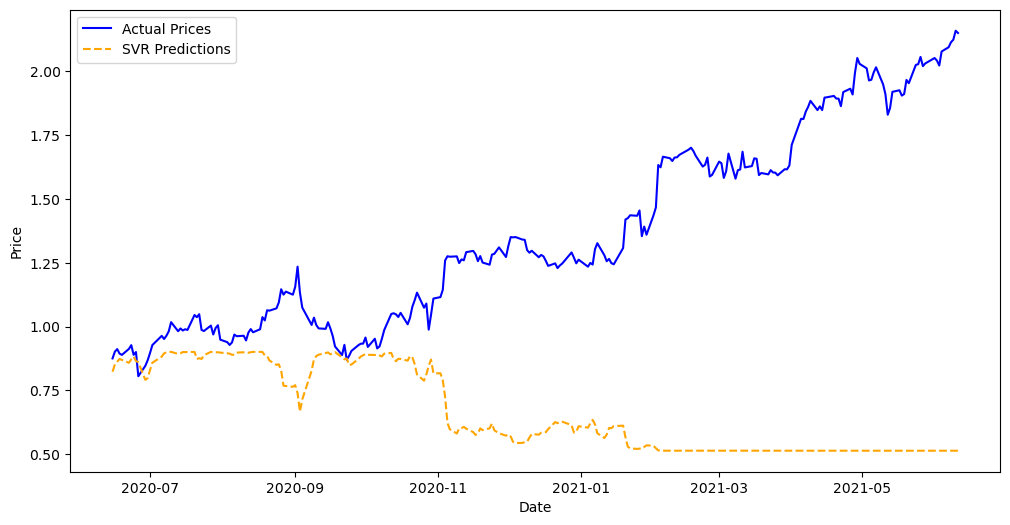

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Prepare data for SVR
X_train = train_data_scaled[['open', 'lag_1', 'lag_2']].values
y_train = train_data_scaled[['close']].values

X_test = test_data_scaled[['open', 'lag_1', 'lag_2']].values
y_test = test_data_scaled[['close']].values

# SVR Model
svr_model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1)
)
svr_model.fit(X_train, y_train.ravel())

# Predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, svr_predictions)
print(f"SVR Mean Squared Error: {mse:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, color='blue', label='Actual Prices')
plt.plot(test_data.index, svr_predictions, color='orange', linestyle='--', label='SVR Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## GBM

GBM Mean Squared Error: 0.2770


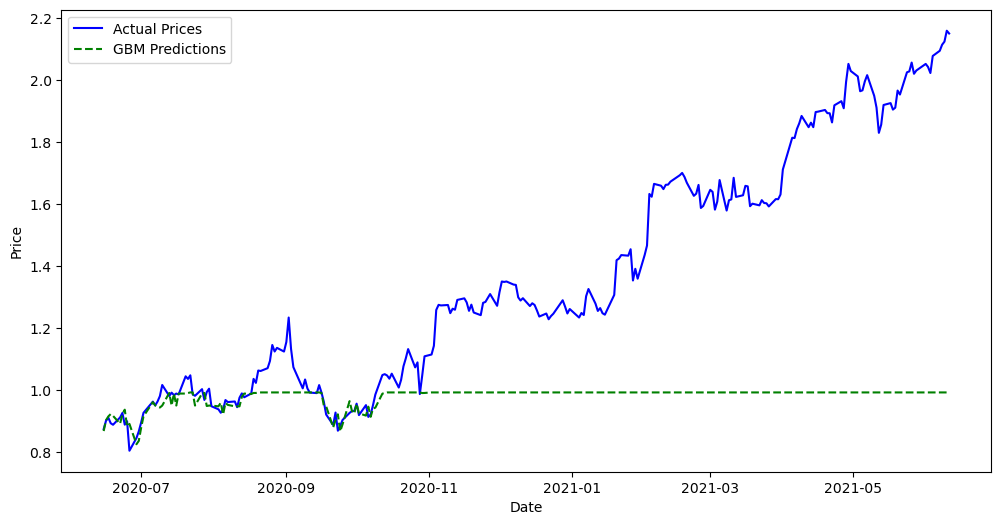

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# GBM Model
gbm_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbm_model.fit(X_train, y_train.ravel())

# Predictions
gbm_predictions = gbm_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, gbm_predictions)
print(f"GBM Mean Squared Error: {mse:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, color='blue', label='Actual Prices')
plt.plot(test_data.index, gbm_predictions, color='green', linestyle='--', label='GBM Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## XGB

In [23]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [24]:
# Prepare the training and testing data with lag features
X_train = train_data_scaled[['open', 'lag_1', 'lag_2']].values
y_train = train_data_scaled[['close']].values

X_test = test_data_scaled[['open', 'lag_1', 'lag_2']].values
y_test = test_data_scaled[['close']].values


In [25]:
# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,      # Number of boosting rounds
    learning_rate=0.1,     # Step size shrinkage
    max_depth=3,           # Maximum depth of trees
    objective='reg:squarederror',  # Objective function for regression
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train.ravel())


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

XGBoost Mean Squared Error: 0.2793


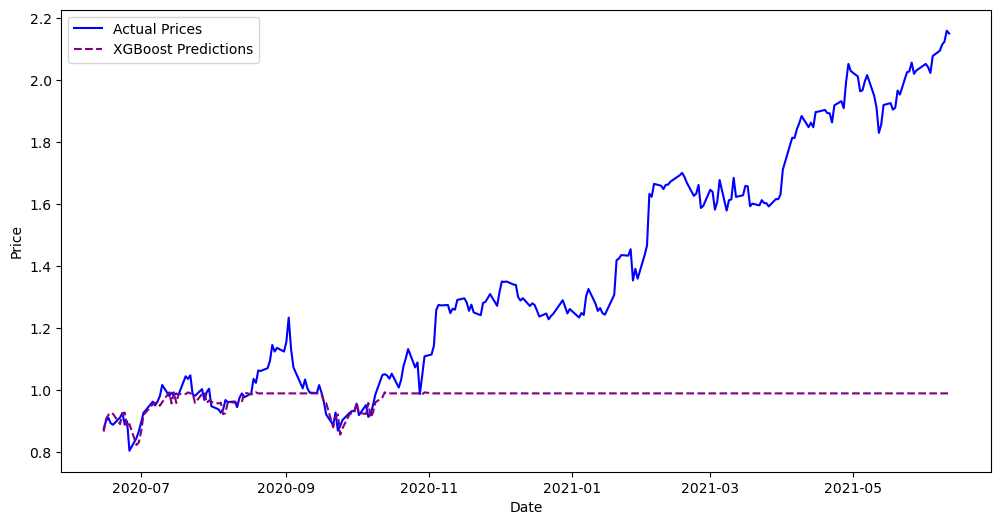

In [26]:
# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {mse:.4f}")

# Optionally, plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, color='blue', label='Actual Prices')
plt.plot(test_data.index, xgb_predictions, color='purple', linestyle='--', label='XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
